In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;


In [7]:
df = pd.read_csv('titanic_toy.csv')
print(df.shape)
df.head()

(891, 4)


,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [10]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [12]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [13]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
mean_age , median_age = X_train['Age'].mean() , X_train['Age'].median()

mean_fare,median_fare = X_train['Fare'].mean(), X_train['Fare'].median()

In [30]:
X_train['age_median'] = X_train['Age'].fillna(median_age)
X_train['age_mean'] = X_train['Age'].fillna(mean_age)

X_train['fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['fare_mean'] = X_train['Fare'].fillna(mean_fare)

X_train.head()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


In [31]:
print('original age variance : ', X_train['Age'].var())
print('age variance after mean imputation : ', X_train['age_mean'].var())
print('age variance after median imputation : ', X_train['age_median'].var())

print('original fare variance : ', X_train['Fare'].var())
print('fare variance after mean imputation : ', X_train['fare_mean'].var())
print('fare variance after median imputation : ', X_train['fare_median'].var())

original age variance :  210.2517072477435
age variance after mean imputation :  168.85193366872227
age variance after median imputation :  169.20731007048155
original fare variance :  2761.0314349486343
fare variance after mean imputation :  2621.232374951235
fare variance after median imputation :  2637.012481677765


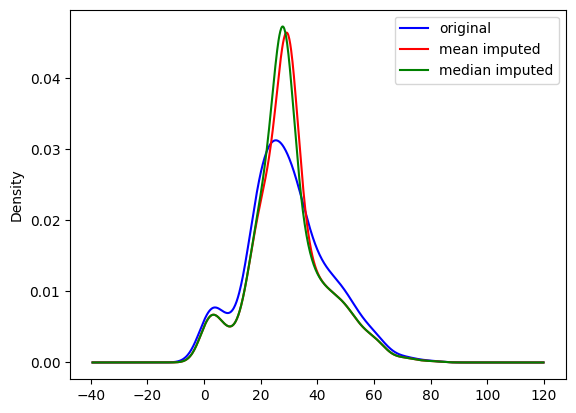

In [35]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax, label='original', color='blue')
X_train['age_mean'].plot(kind='kde', ax=ax, color='red',label='mean imputed')
X_train['age_median'].plot(kind='kde', ax=ax, color='green',label='median imputed')

plt.legend()
plt.show()
# huge changes of distribution after imputation on 'Age' feature so its recommended not to use mean or median imputation here   

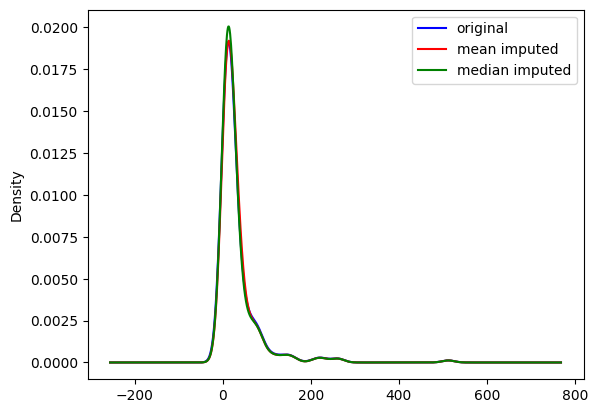

In [39]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax, label='original', color='blue')
X_train['fare_mean'].plot(kind='kde', ax=ax, color='red',label='mean imputed')
X_train['fare_median'].plot(kind='kde', ax=ax, color='green',label='median imputed')

plt.legend()
plt.show()
# small changes of distribution after imputation on 'Fare' feature so its recommended to use mean or median imputation here

In [41]:
X_train.cov()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [42]:
X_train.corr()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

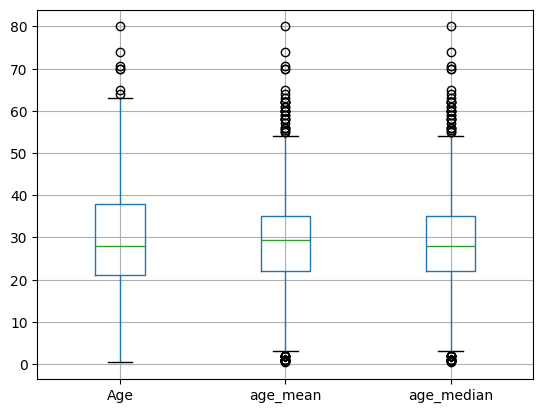

In [44]:
X_train[['Age','age_mean','age_median']].boxplot()

<Axes: >

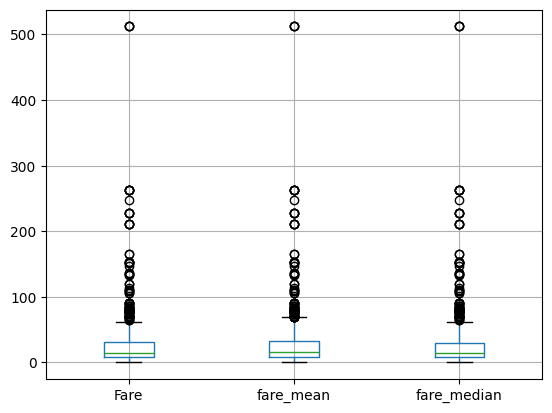

In [46]:
X_train[['Fare','fare_mean','fare_median']].boxplot()

### **using sklearn**

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [48]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')

In [ ]:
trf = ColumnTransformer([
    ('imputer_mean' , imputer_mean , ['Fare']),
    ('imputer_median' , imputer_median , ['Age'])
],remainder="passthrough")

In [53]:
trf.fit(X_train)

,transformers,"[('imputer_mean', ...), ('imputer_median', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [64]:
X_train['Age'].median(), trf.named_transformers_['imputer_median'].statistics_

(np.float64(28.75), array([28.75]))

In [65]:
X_train['Fare'].mean(),trf.named_transformers_['imputer_mean'].statistics_

(np.float64(32.61759689349112), array([32.61759689]))

In [66]:
X_train_trf = trf.transform(X_train)
X_test_trf = trf.transform(X_test)


In [70]:
X_train_trf

array([[ 27.7208,  40.    ],
       [ 16.7   ,   4.    ],
       [  9.    ,  47.    ],
       ...,
       [ 49.5042,  71.    ],
       [221.7792,  28.75  ],
       [ 25.925 ,  28.75  ]], shape=(712, 2))